<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/SNS/UT3/T2/Ayoze_Gil_Sosa_Act_3_2_Iris_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ayoze Gil Sosa

# Importación de librerías

In [1]:
# Librerías para tratamiento y visualización de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Librerías para trabajar con modelos de entranamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
# Librerías de los modelos a comparar
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Carga de datos

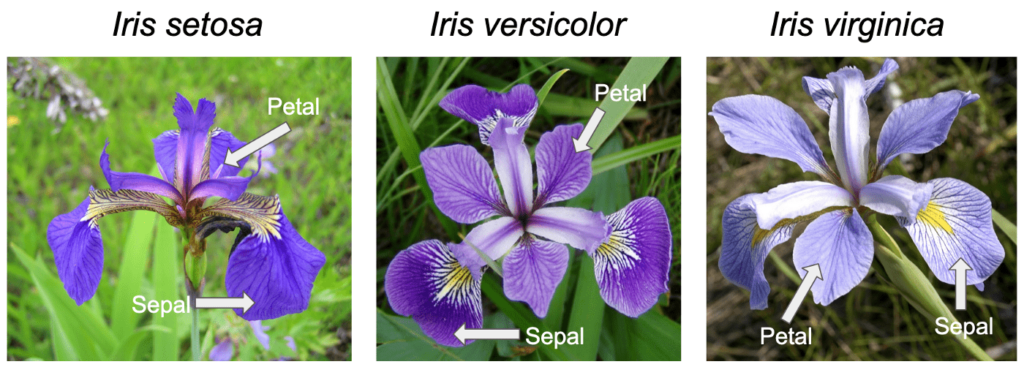

In [2]:
# Se carga el conjunto de datos de entre los disponibles en la libreía seaborn
database_name = 'iris'
data = sns.load_dataset(database_name)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Variables y parámetros

In [3]:
# Tupla con los modelos a comparar
model_names = ('BernoulliNB',
               'ComplementNB',
               'GaussianNB',
               'MultinomialNB',
               'CategoricalNB')

# Conjunto de datos y campo a predecir
field_name = "species"

# Transformar las columnas con datos no númericos a valores categóricos
all_columns_to_categorical = True
field_name_to_categorical = False

# Columnas a eliminar
# Nota: Se eliminan las columnas no numéricas automáticamente
columns_to_discard = []

# Columnas a escalar
columns_to_minmax_scale = []
columns_to_standard_scale = []
#Nota: ComplementNB, MultinomialNB y CategoricalNB no admiten valores negativos

# Tratamiento del conjunto de datos

1. Se comprueban las diferentes categorías disponibles
2. Se eliminan aquellas filas que contengan valores NaN
3. Se eliminan las columnas seleccionadas
4. Se transforman (a valores categóricos) o eliminan las columnas no numéricas
5. Se escalan las columnas seleccionadas

In [4]:
##########
# PASO 1 #
##########

# Guarda array con las categorías
df = data.copy()
field_categories = df[field_name].unique()

##########
# PASO 2 #
##########

# Eliminación de filas con valores NaN y reajuste de los indices
df.dropna(inplace=True)
df.index = range(df.shape[0])

# Visualización de registros de cada categoría
rows_before = data[field_name].value_counts()
rows_after = df[field_name].value_counts()
display(pd.DataFrame(pd.concat([rows_before, rows_after], axis=1, keys=["before", "after"])))
print(f"\n{data.shape[0] - df.shape[0]} rows deleted\n")

,before,after
setosa,50,50
versicolor,50,50
virginica,50,50



0 rows deleted



In [5]:
##########
# PASO 3 #
##########

# Se eliminan las columnas seleccionadas
for column in columns_to_discard:
  del df[column]

##########
# PASO 4 #
##########

# Se transforman las variables no numéricas a categóricas
if all_columns_to_categorical:
  for column in df.columns:
    # Revisa el campo a predecir de forma individual
    if column == field_name and not field_name_to_categorical:
      continue
    # Comprueba las columna no numéricas para pasarlo a valores categóricos
    if not (pd.api.types.is_numeric_dtype(df[column].dtype)):
      types = df[column].unique()
      df[column].replace(types, range(len(types)), inplace=True);
# Se eliminan las variables no numéricas
else:
  for column in df.columns:
    # Revisa el campo a predecir de forma individual
    if column == field_name:
      continue
    # Elimina las columnas
    if not (pd.api.types.is_numeric_dtype(df[column].dtype)):
      del df[column]

##########
# PASO 5 #
##########

# Se eliminan los datos de las columnas seleccionadas
if columns_to_minmax_scale:
  scaler = MinMaxScaler()
  df[columns_to_minmax_scale] = scaler.fit_transform(df[columns_to_minmax_scale])
if columns_to_standard_scale:
  scaler = StandardScaler()
  df[columns_to_standard_scale] = scaler.fit_transform(df[columns_to_standard_scale])


# Visualización de un registro de cada categoría antes y después
display(data.drop_duplicates(field_name, keep='first'))
print(f"{data.shape[0]} rows x {data.shape[1]} columns")

display(df.drop_duplicates(field_name, keep='first'))
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


150 rows x 5 columns


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


150 rows x 5 columns


# Visualización de la relación entre columnas


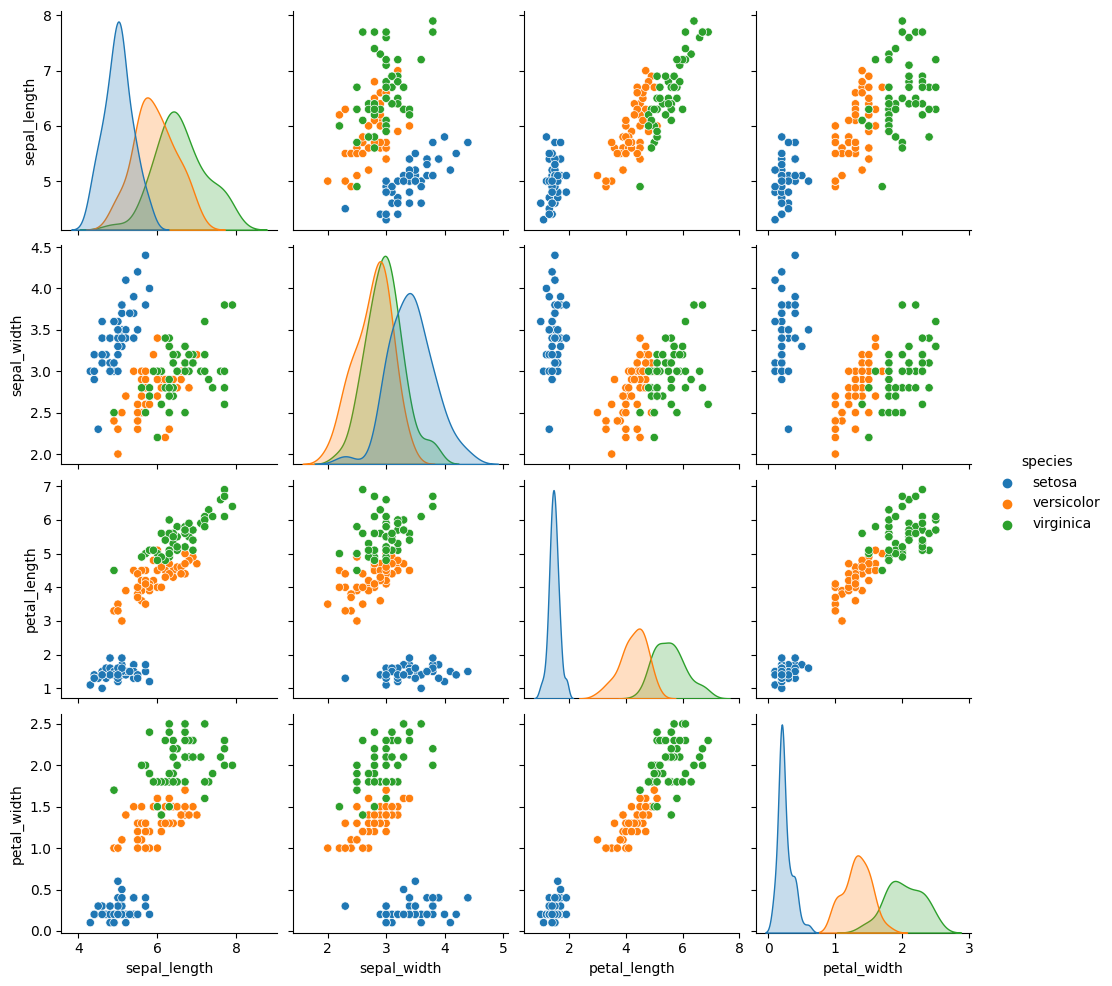

In [6]:
# Gráfico de dispersión que muestra la relación entre las variables numéricas.
sns.pairplot(df, hue=field_name)

# Entrenamiento del modelo

1. Se separan datos de entrada y de salida
2. Se separan datos de entrenamiento y test
3. Se instancia el modelo
4. Se entrena en el modelo con los datos de entrenamiento
5. Se predice el target para los datos de test
6. Se realiza la evaluación del modelo

In [7]:
##########
# PASO 1 #
##########

# Se separan los datos de entrada y salida
X = df.drop(field_name, axis=1)
y = df[field_name]
display(X)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
##########
# PASO 2 #
##########

# Se separan datos de train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=1)

# Visualización de registros de cada categoría
train_samples = ytrain.value_counts()
test_samples = ytest.value_counts()
samples = pd.concat([train_samples, train_samples/len(ytrain), test_samples, test_samples/len(ytest)],
                    axis=1,
                    keys=["train", "train(%)", "test", "test(%)"])

# Editamos los índices en caso de ser valores numéricos
if field_name_to_categorical:
  samples.index = field_categories[samples.index]

samples

,train,train(%),test,test(%)
virginica,36,0.36,14,0.28
setosa,33,0.33,17,0.34
versicolor,31,0.31,19,0.38


In [9]:
# Función para entrenamiento, predicción y evaluación de un modelo.
def use_model(model_name):

  print(f"\n-------------\n{model_name}\n-------------\n")
  ##########
  # PASO 3 #
  ##########

  # Obtenemos la clase a partir de su nombre
  # Nota: CategoricalNB no está diseñado para datos continuos. Dará error si
  # en los datos de test hay un valor que no está en los datos de entrenamiento.
  # El parámetno min_categories indica el número de valores 'discretos' distintos
  # que existen para evitar que lo defina sólo con los datos de entramiento.
  model_class = globals()[model_name]
  if model_name == 'CategoricalNB':
    model = model_class(min_categories=((X.max()+1)*1.5).astype(int))
  else:
    model = model_class()

  ##########
  # PASO 4 #
  ##########

  # Entrenamos el modelo con los datos de entrenamiento
  model.fit(Xtrain, ytrain)

  ##########
  # PASO 5 #
  ##########

  # Predicción con los datos de test
  y_model = model.predict(Xtest)
  print(y_model)

  ##########
  # PASO 6 #
  ##########

  # Evaluación y cálculo de la precisión
  accuracy = accuracy_score(ytest, y_model)
  print(f"accuracy: {accuracy}")
  return model, accuracy, y_model


# Llamada a la función de entrenamiento para cada modelo
models = []
for i, model_name in enumerate(model_names):
  models.append(list(use_model(model_name)))


-------------
BernoulliNB
-------------

['virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica']
accuracy: 0.28

-------------
ComplementNB
-------------

['setosa' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica'
 'virginica' 'setosa' 'setosa' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica'
 'setosa' 'setosa' 'virginica' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 

# Visualización de resultados

1. Transformación de variables categóricas reales a valores enteros
2. Transformación de variables categóricas predichas a valores enteros
3. Visualización de la matriz de confusión

In [10]:
##########
# PASO 1 #
##########

# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df[field_name].replace(field_categories,range(len(field_categories)), inplace=True)

def transform_to_categorical_array(y_model):
  # Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
  y_model_df= pd.DataFrame(y_model, columns = [field_name])
  y_model_df[field_name].replace(field_categories,range(len(field_categories)), inplace=True)
  # Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
  y_model_array = y_model_df[field_name].to_numpy()
  return y_model_array

In [11]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante
# y_true     : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred     : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# classes    : ndarray   -> Los nombres de las clases/valores objetivos como array de numpy
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None,
                          fig=None,
                          ax=None):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if not fig:
      fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=titleSup,
           ylabel='True label',
           xlabel='Predicted label')
    ax.annotate(title, xy=(0.5, 1.1), xytext=(0, 10),
            xycoords='axes fraction', textcoords='offset points',
            ha='center', va='baseline', fontsize=10)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    fig.tight_layout()
    fig.suptitle(title, fontsize=16, y=1, ha='center')
    return ax

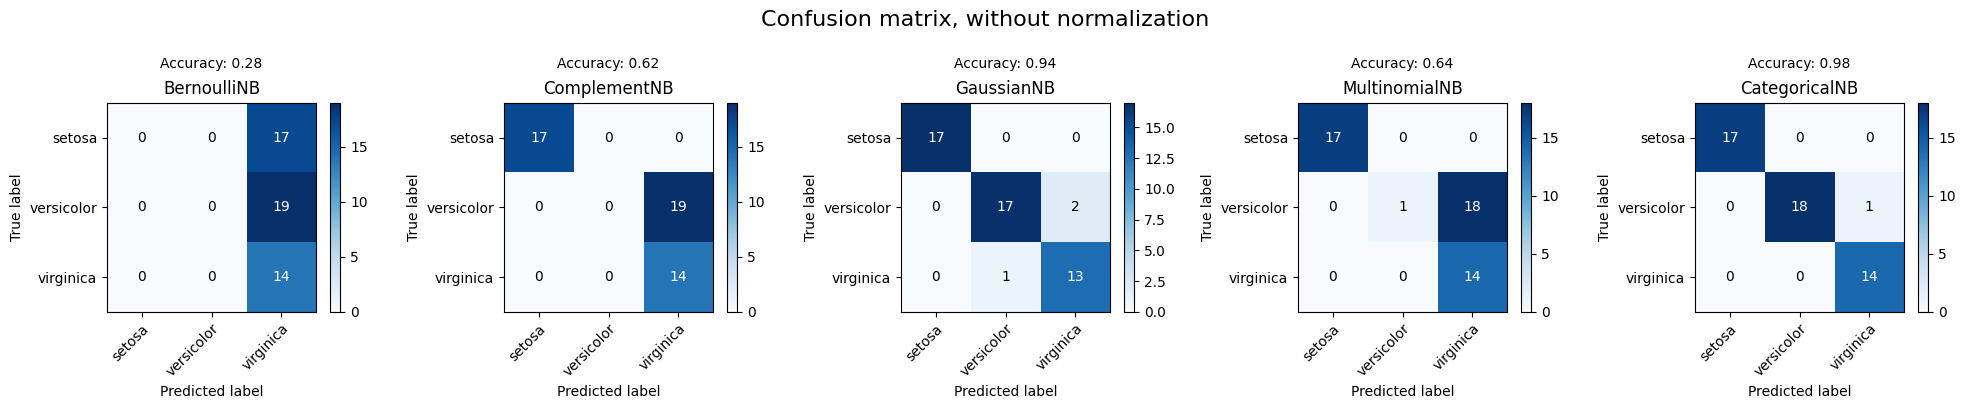

In [12]:
# Creamos el contenedor para representar los resultados
fig, ax = plt.subplots(nrows=1, ncols = len(model_names), figsize = (4*len(model_names),4))

# Representamos la matriz de confusión para cada modelo asignando los parámetros
for idx, model in enumerate(models):

  ##########
  # PASO 2 #
  ##########

  # Transformamos variables categóricas a valores numéricos/enteros
  y_model_array = transform_to_categorical_array(models[idx][2])

  ##########
  # PASO 3 #
  ##########

  # Creamos este array de numpy porque es el parámetro con las clases que espera la función
  classes = np.array(field_categories)
  plot_confusion_matrix(ytest_df[field_name],
                        y_model_array,
                        classes=classes,
                        normalize=False,
                        title=f'Accuracy: {str(round(model[1],2))}',
                        titleSup=model_names[idx],
                        fig=fig,
                        ax=ax[idx%len(model_names)] if len(model_names) > 1 else ax)


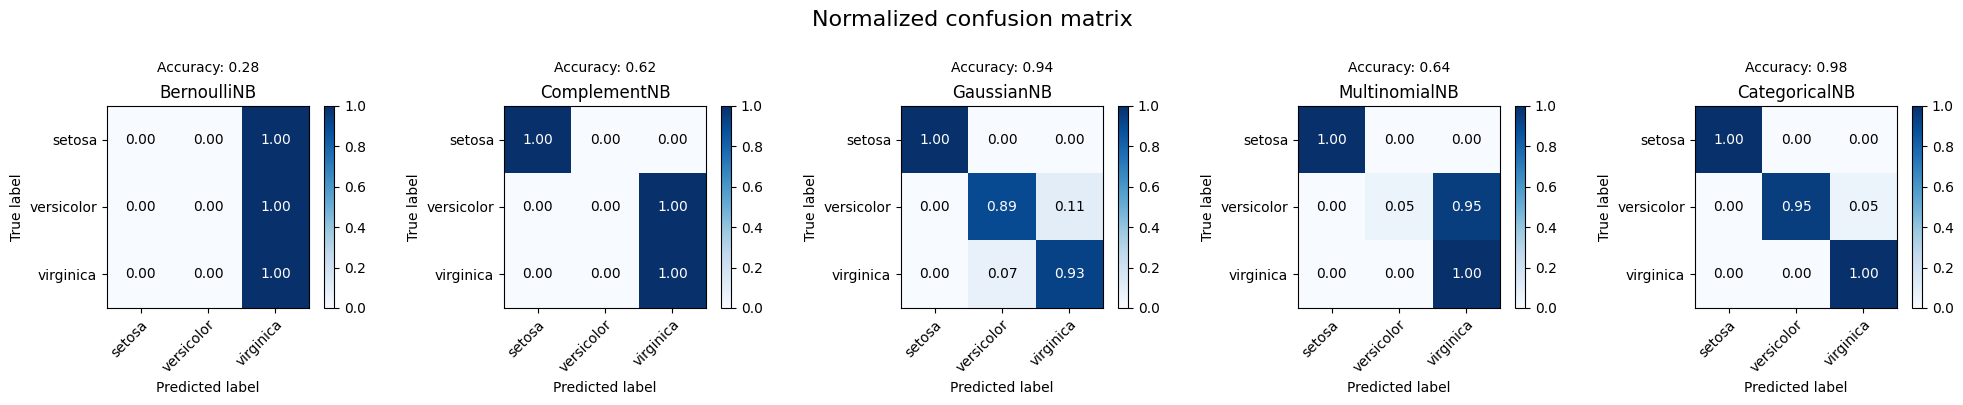

In [13]:
# Creamos el contenedor para representar los resultados normalizados
fig, ax = plt.subplots(nrows=1, ncols = len(model_names), figsize = (4*len(model_names),4))

# Representamos la matriz de confusión normalizada para cada modelo asignando los parámetros
for idx, model in enumerate(models):

  y_model_array = transform_to_categorical_array(models[idx][2])

  # Creamos este array de numpy porque es el parámetro con las clases que espera la función
  classes = np.array(field_categories)
  plot_confusion_matrix(ytest_df[field_name],
                        y_model_array,
                        classes=classes,
                        normalize=True,
                        title=f'Accuracy: {str(round(model[1],2))}',
                        titleSup=model_names[idx],
                        fig=fig,
                        ax=ax[idx%len(model_names)] if len(model_names) > 1 else ax)